## Visualize costs


In [1]:
import os
import sys
sys.path.append('..')
from optimization.input_data import load_forecasts, load_params, preprocess_data, load_costs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from optimization.utils import cdf_formula, pdf_formula
from scipy.integrate import quad
os.getcwd()

'c:\\Users\\Paulina\\OneDrive\\Desktop\\UNIVERSITYMASTER\\Masterarbeit\\Code2025\\Day-Ahead-Battery-Scheduling\\optimization'

In [2]:
def get_file_path(filename):
    ''' Get file path to store plots in a temporary folder for logging in mlflow. '''
    temp_folder = os.path.join(os.getcwd(), 'temporary_folder')
    os.makedirs(temp_folder, exist_ok=True)

    return os.path.join(temp_folder, filename)

In [ ]:
# Nominal grid powers for specificdays and Day-Ahead (DA) or Intra-Day (ID), so we can compare the grid deviations between the models

# nom grid power obtained by Day-Ahead or Intra-Day model
day_1_DA = [-1.5114935408737338, -1.511493540459086, -1.5114935347735887, -1.3675417827854426, -1.3675417774421124, -1.3675417771291674, -1.3675417770497595, -1.3675417770913123, -1.3675417771939042, -1.3675417778450625, -1.367541789186423, -0.7653424886116522, -0.1931344455300074, 0.1466198861708486, 0.1954394640857747, 0.19543946569142387, 0.19543946638832027, 0.19543946674148469, 0.19543946694983427, 0.19543946728896758, 0.1954394676447587, 0.19543946777119853, 0.19543946794339873, 0.19543946816256594]
day_1_ID = [-1.5114935408737338, -1.4122261812806325, -2.0907653429136053, -2.5134269156409235, -2.5431650076970094, -3.5533295519832095, -3.6762583119655283, -3.9714854854446977, -3.952792725527414, -4.085287128870524, -2.698041532451009, -1.4292956191473545, -0.5254778435755755, -0.5133255923904879, -0.49373787932680163, -0.4689475454539644, -0.4646162651764183, -0.5410778136095448, -0.546565733724933, -0.5839181079624396, -0.7025203671414858, -0.5267361833862882, -0.5423964532248123, -0.4236108311951156]
# ground truth following Day-Ahead or Intra-Day allocation
day_1_DA_gt = [-1.2420432945095579, -1.0066081959317337, -1.511493534773589, -2.5381102813781222, -2.458696376416663, -4.938660173951327, -4.884705721267727, -4.579827990612287, -3.750033965278215, -3.7602108961912024, -1.3675417891864234, -0.7653424886116516, 0.875825858427091, -0.08362831551818567, 0.11858442560083235, 0.10255195584720828, 0.15083149076756777, 0.13771564562161254, 0.17743070577266948, 0.19543946728896766, 0.19543946764475878, 0.19543946777119858, 0.1954394679433988, 0.19543946816256602]
day_1_ID_gt = [-1.2420432945095579, -1.2335173546596487, -1.8533466324026717, -2.002239869444737, -2.3454526895239214, -3.6174674614854965, -3.961860440525206, -4.407081629640974, -4.459937242122856, -4.698335230510854, -2.796117292748459, -1.7748051700233316, 0.433062454324648, -1.1289456331036747, -0.7042722855658261, -0.6301756204548006, -0.6286643073569936, -0.5617602673955977, -0.525122115817963, -0.5839181079624396, -0.6067793839827359, -0.6190816707317347, -0.6566295294848901, -0.5155050056885953]

day_2_DA = [-3.1336552219111216, -3.133655221487317, -3.1336552158946454, -2.849729263023783, -2.9846436815717987, -2.9846436815967015, -2.984643681552583, -2.9846436816247723, -2.9846436820719444, -2.9846436904669313, -2.469820261916226, -1.458536568828687, -0.6327863163476908, -0.04373277943011834, 0.11752465859656595, 0.11752466194161283, 0.11752466274348694, 0.1175246636084224, 0.117524663356916, 0.11752466232483418, 0.11752466238112864, 0.11752466522666484, 0.11752466476122536, 0.10633185593383811]
day_2_ID = [-3.1336552219111216, -3.2090322117281773, -2.577561285398779, -2.237740766491124, -2.0989608086559017, -1.7586258701854107, -1.4669097320947608, -1.2288870312647475, -1.030116146118332, -0.9339280223999832, -0.6663729920784741, -0.5237514944483392, -0.28023654196322817, -0.15153698160309378, -0.15451656015912504, -0.0760267618202852, -0.12044462579496883, -0.11830679163125477, -0.03133688533452767, -0.09368744147209966, -0.089368372545383, -0.00739819499477247, -0.08486204969853772, 0.0360459441771658]
day_2_DA_gt = [-2.959910912582841, -2.489823387903055, -1.5279322946626948, -1.1088764300239857, -0.6574352248907904, 0.5525643091225669, 0.6853759831849819, -0.014171196311719703, -0.33129081603176647, -1.719653315669922, -1.4022061621520678, -1.458536569827728, -0.6327863506533018, -0.04373278590733561, 0.11752464927404141, 0.11752465849205308, 0.1175246606730338, 0.11752466305630654, 0.11752466245500645, 0.11752465962359414, 0.11752465963902313, 0.11752466752213324, 0.11752466634757396, 0.12320230129943677]
day_2_ID_gt = [-2.9599109227509257, -2.575766393773865, -1.4419893613515833, -1.146936512105556, -0.9597087674457181, -0.29527275785163787, -0.15421108997717664, -0.2921507135417234, -0.1510754384005312, -0.5387446771909671, -0.23572376338547688, -0.8219687003095635, -0.673724603074234, -0.29528369944608046, -0.26928028847048663, -0.09087665124067275, -0.17353624779743212, -0.26432415114379554, -0.1964622806972181, -0.14547071866335912, -0.15467084246171484, -0.17453888045757812, -0.09049752756284128, -0.08962232163585997]

day_3_DA = [-3.5670655618070986, -3.5670655613379956, -3.5670655561074445, -3.3193488640776097, -3.334713520040722, -3.334713519666042, -3.3347135195997413, -3.3347135195586817, -3.3347135197617965, -3.3347135208515213, -3.334713533457823, -2.688085264776801, -1.2912222770062722, -0.40749641504322215, -0.012561007416506188, 0.0375114530837672, 0.03751145679647896, 0.037511458196493576, 0.03751145870855703, 0.03751145747916026, 0.03751145832399939, 0.03751145838593215, 0.03751145595762104, 0.023357228754584267]
day_3_ID = [-3.5670655618070986, -3.6728779161066503, -3.6388934816015652, -3.738202353309265, -3.200202544407019, -2.7202234139303103, -2.414563777809083, -2.292864246944387, -1.9188392576320772, -1.7771869437881098, -1.4258663648793621, -1.067667345363489, -0.7929347054526555, -0.601256075038187, -0.5362515891830855, -0.4919309751493, -0.4947653736410884, -0.5037828335339547, -0.47949013731379175, -0.44910545943520774, -0.5378378540519665, -0.47290616724529533, -0.4841816839333535, -0.37459478092171]
day_3_DA_gt = [-3.117534575630278, -2.634630648051161, -2.9535014448627335, -3.087699953286351, -1.6000817617544185, -1.1254665176802674, -2.035254168182532, -2.7583789181861773, -1.3532279829587954, -3.3347135208515217, -1.8131611269718977, -3.424985839438369, -3.8489858406521122, -0.7799512889824207, -0.05822669477576933, 0.6561099576573874, 0.08725886730794663, 0.03751145819649297, 0.03751145870855643, 0.08012309408058475, 0.04024225972271003, 0.03751145838593167, 0.059566037033332325, 0.19492956507058334]
day_3_ID_gt = [-3.117534575630278, -2.798260383624869, -2.789871704556785, -3.0679714100908666, -2.4308809355064955, -2.055062854503421, -2.2459901609701753, -2.032564559635931, -1.1901176869339607, -1.9090617030313155, -0.9339831220963304, -2.536613999586669, -3.0844725950159804, -1.5556972477482316, -0.9690978112699394, -0.021515040287979268, -0.4727665237742681, -0.5060843265744769, -0.4947140718499559, -0.34746693553597, -0.3934898299243583, -0.43991359901569727, -0.38264667060377505, -0.159206812416127]


hours_list = ['06:00', '07:00', '08:00', '09:00', '10:00', '11:00',
 '12:00', '13:00', '14:00', '15:00', '16:00', '17:00',
 '18:00', '19:00', '20:00', '21:00', '22:00', '23:00',
 '00:00', '01:00', '02:00', '03:00', '04:00', '05:00', '06:00']

## Print nominal grid powers against each other


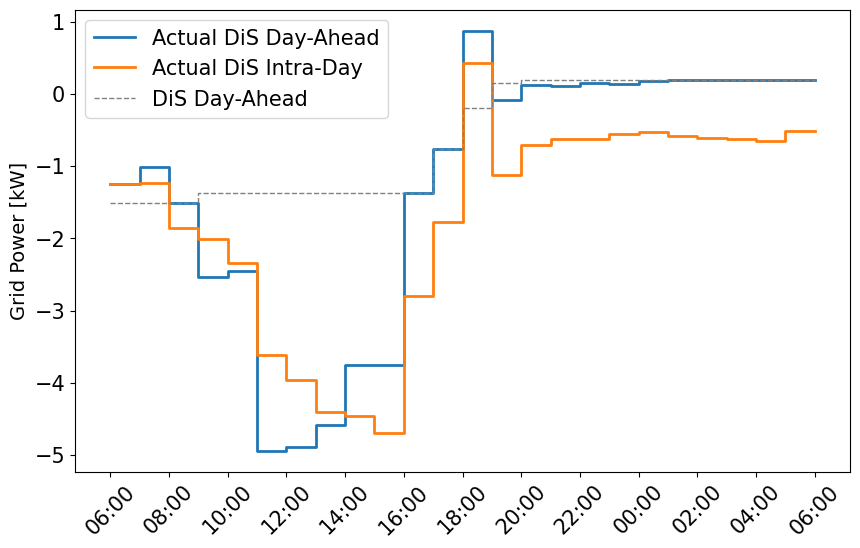

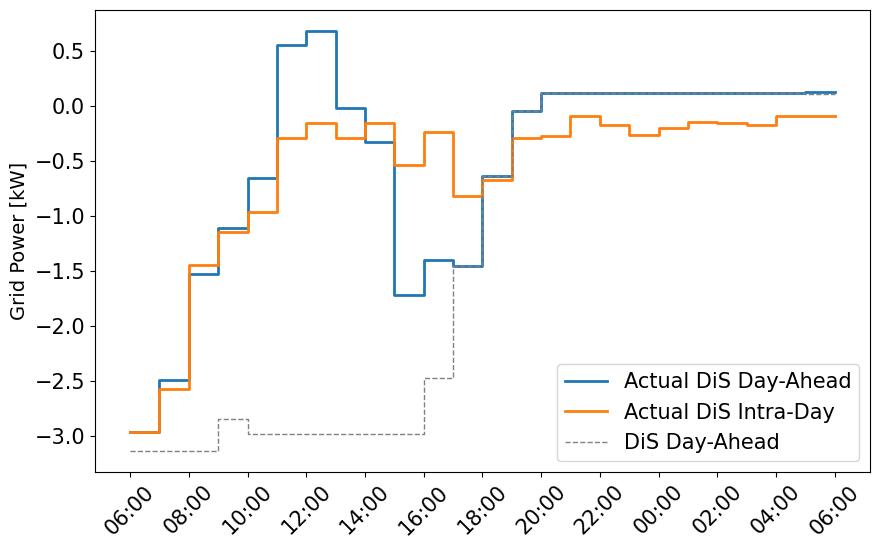

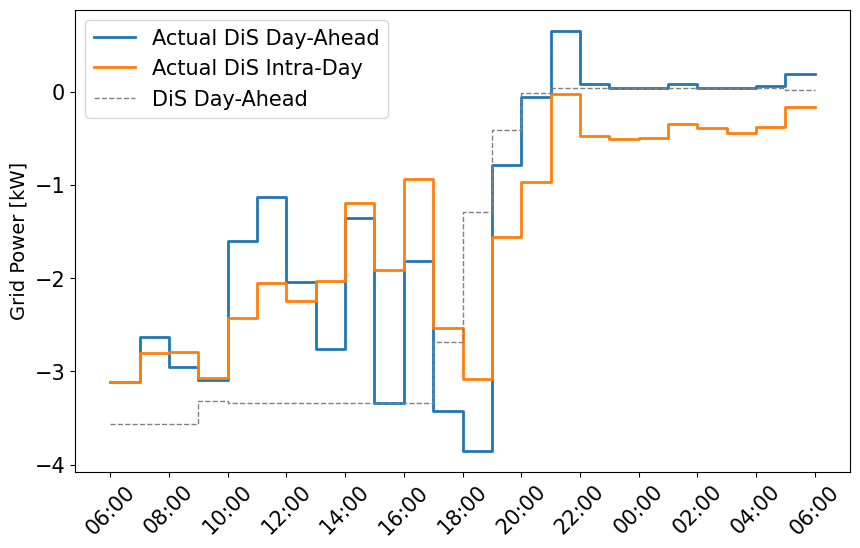

In [ ]:
# Day 1
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10, 6)) 


day_1_DA_gt.append(day_1_DA_gt[-1])
day_1_DA.append(day_1_DA[-1])
day_1_ID_gt.append(day_1_ID_gt[-1])

ax.step(range(len(hours_list)), day_1_DA_gt, label='Actual DiS Day-Ahead', linewidth=2, where='post')
ax.step(range(len(hours_list)), day_1_ID_gt, label='Actual DiS Intra-Day', linewidth=2, where='post')
ax.step(range(len(hours_list)), day_1_DA, label='DiS Day-Ahead', linestyle='dashed', linewidth=1, color='grey', where='post')
ax.legend()
plt.xticks(ticks=range(len(hours_list))[::2], labels=hours_list[::2], rotation=45)
plt.ylabel('Grid Power [kW]', fontsize=14)

# Save figure
file_path = get_file_path('dis_costs_day1.png')
plt.savefig(file_path, dpi=300, bbox_inches = 'tight')

# Day 2
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10, 6)) 


day_2_DA_gt.append(day_2_DA_gt[-1])
day_2_DA.append(day_2_DA[-1])
day_2_ID_gt.append(day_2_ID_gt[-1])

ax.step(range(len(hours_list)), day_2_DA_gt, label='Actual DiS Day-Ahead', linewidth=2, where='post')
ax.step(range(len(hours_list)), day_2_ID_gt, label='Actual DiS Intra-Day', linewidth=2, where='post')
ax.step(range(len(hours_list)), day_2_DA, label='DiS Day-Ahead', linestyle='dashed', linewidth=1, color='grey', where='post')
ax.legend()
plt.xticks(ticks=range(len(hours_list))[::2], labels=hours_list[::2], rotation=45)
plt.ylabel('Grid Power [kW]', fontsize=14)

# Save figure
file_path = get_file_path('dis_costs_day2.png')
plt.savefig(file_path, dpi=300, bbox_inches = 'tight')

# Day 3
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10, 6)) 

day_3_DA_gt.append(day_3_DA_gt[-1])
day_3_DA.append(day_3_DA[-1])
day_3_ID_gt.append(day_3_ID_gt[-1])

ax.step(range(len(hours_list)), day_3_DA_gt, label='Actual DiS Day-Ahead', linewidth=2, where='post')
ax.step(range(len(hours_list)), day_3_ID_gt, label='Actual DiS Intra-Day', linewidth=2, where='post')
ax.step(range(len(hours_list)), day_3_DA, label='DiS Day-Ahead', linestyle='dashed', linewidth=1, color='grey', where='post')
ax.legend()
plt.xticks(ticks=range(len(hours_list))[::2], labels=hours_list[::2], rotation=45)
plt.ylabel('Grid Power [kW]', fontsize=14)
# Save figure
file_path = get_file_path('dis_costs_day3.png')
plt.savefig(file_path, dpi=300, bbox_inches = 'tight')

#plt.show()

# Print deviations costs of DA and ID
deviations costs mean the difference between 
- nominal day ahead schedule and ground truth due to day ahead schedule
- nominal day ahead schedule and ground truth due to intra day schedule

In [20]:
day_1_DA_diff = np.array(day_1_DA - day_1_DA_gt)
day_1_ID_diff = np.array(day_1_DA - day_1_ID_gt)

day_2_DA_diff = np.array(day_2_DA - day_2_DA_gt)
day_2_ID_diff = np.array(day_2_DA - day_2_ID_gt)

day_3_DA_diff = np.array(day_3_DA - day_3_DA_gt)
day_3_ID_diff = np.array(day_3_DA - day_3_ID_gt)

In [ ]:
# Calculate the sum of the absolute values of these to obtain grid deviation costs
day_1_DA_cost = np.sum(np.abs(day_1_DA_diff))
day_1_ID_cost = np.sum(np.abs(day_1_ID_diff))

day_2_DA_cost = np.sum(np.abs(day_2_DA_diff))
day_2_ID_cost = np.sum(np.abs(day_2_ID_diff))

day_3_DA_cost = np.sum(np.abs(day_3_DA_diff))
day_3_ID_cost = np.sum(np.abs(day_3_ID_diff))

print(day_1_DA_cost)
print(day_1_ID_cost)
print(day_2_DA_cost)
print(day_2_ID_cost)
print(day_3_DA_cost)
print(day_3_ID_cost)

19.70108016134339
29.134965213722182
21.671888347965723
25.619277691609945
16.16998954793315
20.382953015113532


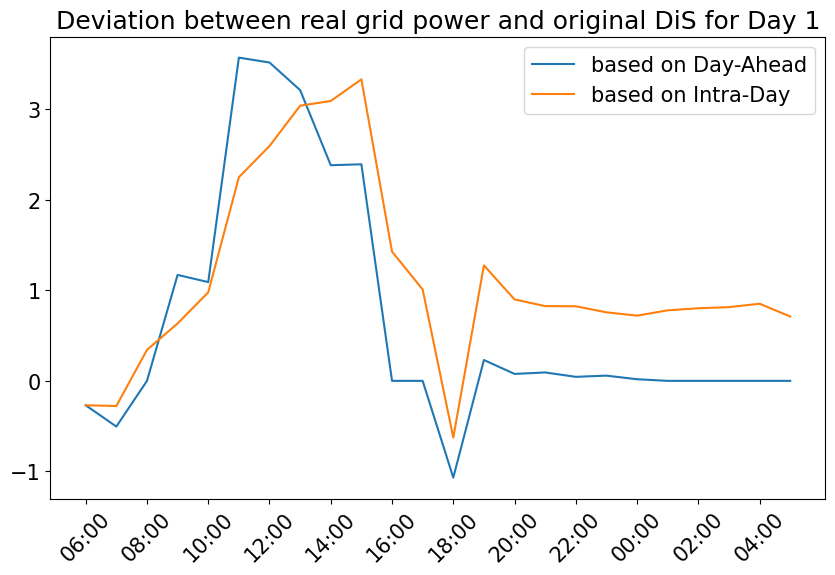

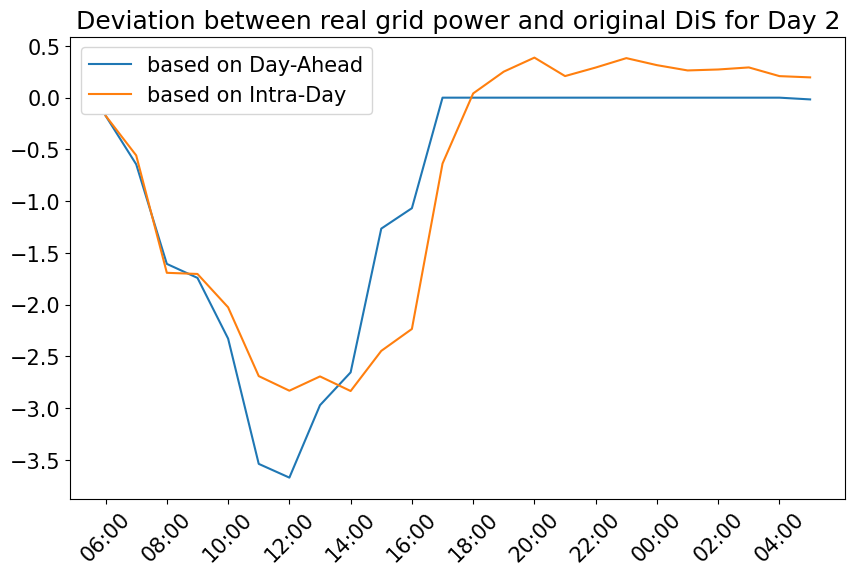

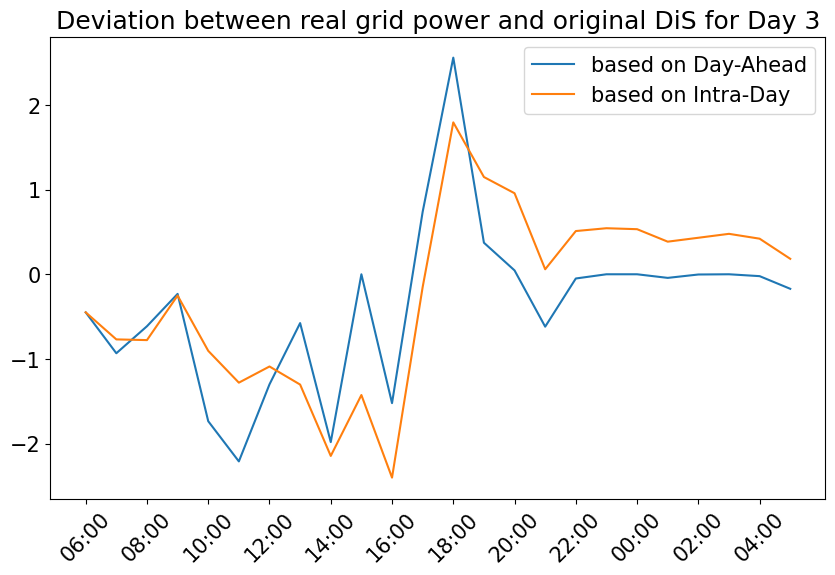

In [22]:
# Day 1
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10, 6)) 

ax.plot(hours_list, day_1_DA_diff, label='based on Day-Ahead')
ax.plot(hours_list, day_1_ID_diff, label='based on Intra-Day')
ax.legend()
plt.xticks(hours_list[::2], rotation=45)
plt.title('Deviation between real grid power and original DiS for Day 1')
# Save figure
file_path = get_file_path('dis_costs_day1.png')
plt.savefig(file_path, dpi=300, bbox_inches = 'tight')

# Day 2
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10, 6)) 

ax.plot(hours_list, day_2_DA_diff, label='based on Day-Ahead')
ax.plot(hours_list, day_2_ID_diff, label='based on Intra-Day')
plt.title('Deviation between real grid power and original DiS for Day 2')
ax.legend()
plt.xticks(hours_list[::2], rotation=45)
# Save figure
file_path = get_file_path('dis_costs_day2.png')
plt.savefig(file_path, dpi=300, bbox_inches = 'tight')

# Day 3
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(10, 6)) 

ax.plot(hours_list, day_3_DA_diff, label='based on Day-Ahead')
ax.plot(hours_list, day_3_ID_diff, label='based on Intra-Day') 
plt.title('Deviation between real grid power and original DiS for Day 3')
ax.legend()

plt.xticks(hours_list[::2], rotation=45)
# Save figure
file_path = get_file_path('dis_costs_day3.png')
plt.savefig(file_path, dpi=300, bbox_inches = 'tight')

## MOO vs. Intra 

In [23]:
# Nominal grid powers for specificdays and Day-Ahead (DA) or Intra-Day (ID), so we can compare the grid deviations between the models
# 70g/30ss

# nom grid power
day_1_MOO_7030 = np.array([-1.511493540873734, -1.4726493131412772, -2.0834548014124925, -2.506224113986397, -2.535541295063086, -3.541870610072588, -3.664799373931982, -3.960026614853238, -3.952296595260234, -4.128688870594472, -2.7652195578862284, -1.5183065381338947, -0.6164351974585291, -0.5058407255637927, -0.46784035891607023, -0.43431953082175073, -0.4260040659068817, -0.5197364483459764, -0.5075858684221979, -0.532604973130791, -0.6107016386524368, -0.5301326205024611, -0.5454883442141275, -0.42664042256047663])
day_1_ID_7030 = np.array([-1.511493540873734, -1.519781663735722, -2.0814762296829645, -2.5002573549209077, -2.529153058240114, -3.5334479236679037, -3.6563766884472013, -3.9516039470317366, -3.9558247967722497, -4.132370912187363, -2.872231742857598, -1.6420248056230518, -0.6748403624858715, -0.4696501323040155, -0.4343249305315405, -0.41553327106329346, -0.40873696385174785, -0.4957993508090949, -0.49641852932681296, -0.5244704869286102, -0.574449628684583, -0.5236648759376041, -0.5246742040686592, -0.44911637239580093])
# ground truth
day_1_MOO_gt_7030 = np.array([-1.2420432945095579, -1.2887028301379253, -1.8502957945449456, -1.9979834381141846, -2.34938133383162, -3.606008524643116, -3.9504015065855245, -4.395622759574584, -4.4594411130372595, -4.741736972234802, -2.8632953195628836, -1.8638160598693796, 0.3421050999344839, -1.1214607662769795, -0.6783747673311005, -0.5645963754343277, -0.5805548357229839, -0.5404188676625011, -0.49517453685381063, -0.532604973130791, -0.5421028287720383, -0.6224780772294035, -0.659721427333015, -0.5185345997635198])
day_1_ID_gt_7030 = np.array([-1.2420432945095579, -1.3320293447443243, -1.8501572701004334, -1.9949670593185893, -2.346777054884409, -3.5975858345824077, -3.9419788211007436, -4.387200091753083, -4.462969314549275, -4.745419013827693, -2.9650902390522695, -1.916248081619067, 0.2836999333223259, -1.0765740512463808, -0.627741932307389, -0.5395794601387137, -0.5485966521531328, -0.5164817478139554, -0.4911581919934872, -0.5244704869286102, -0.5188020866518503, -0.5950157883635566, -0.6389072735526065, -0.5410104598580141])

# 30g/70ss
# TODO this one is not correctly copied
day_1_MOO_3070 = np.array([-1.511493540873734, -1.4108250266853344, -2.091255010234544, -2.514191858040752, -2.544162814999878, -3.5540155032898357, -3.6769442621951005, -3.9721714458140918, -3.9611932095763893, -4.1272428090517534, -2.3661549620674744, -1.327139298196078, -0.5511236927376099, -0.5406395787273452, -0.5242537367505958, -0.48955524278230940904, -0.5681023775807462, -0.44933491810366677])
day_1_ID_3070 = np.array([-1.511493540873734, -1.4034112491960247, -2.093609203894055, -2.5177398022644084, -2.549231301064092, -3.5613445880462957, -3.6842733408208, -3.9795003600215635, -3.911649289780241, -4.058188570973643, -2.4288670050083723, -1.2192490111700929, -0.4858333803584146, -0.5514291889701292, -0.5442898241560264, -0.5236828201912697, -0.5147399839404813, -0.5940277051806694, -0.63671250148035, -0.7172243431337386, -0.7558441227254022, -0.5546385312090212, -0.5703117666656229, -0.45154204222427907])

day_1_MOO_gt_3070 = np.array([-1.2420432945095579, -1.229820970875425, -1.8515063019258904, -2.001374755444838, -2.3490075720848815, -3.618153416389793, -3.962546394848643, -4.407767590535438, -4.468337727353415, -4.740290910692083, -2.4642307386969664, -1.6726488543108757, 0.4074166099954107, -1.1562596192834618, -0.7347881451656261, -0.6285479009267346, -0.655930239463532, -0.5968598455043027, -0.560786901664445, -0.6396068084227273, -0.6578866560576051, -0.6447732904956635, -0.682335474214623, -0.5412290993433568])
day_1_ID_gt_3070 = np.array([-1.2420432945095579, -1.2120497547758733, -1.8435970417113516, -1.9942789457313372, -2.3478416417329333, -3.6254824961998735, -3.9698754689044353, -4.41509650474291, -4.418793807557266, -4.671236672613973, -2.526942761782997, -1.5647585592578328, 0.472706921066774, -1.1670492280115443, -0.7548242232346303, -0.684911408649825, -0.6787880050125217, -0.6147101480135625, -0.6143068901631014, -0.6782256385097825, -0.6601031290892969, -0.6469840257415126, -0.6845448403248491, -0.543436225524695])


############ DAY 3 ##############
# 70g/30ss
# nom grid power
day_3_MOO_7030 = np.array([-3.56706555924216, -3.671423261888924, -3.625569260435902, -3.729146882534778, -3.271518802994878, -2.8892393690126763, -2.622268945405653, -2.4147509574314348, -2.1656337672687163, -2.0045365933221464, -1.7242873358296003, -1.1973740479542299, -0.8159466159440576, -0.5372416749405284, -0.42758102858733177, -0.3850124847976917, -0.38640022174375116, -0.3986366479451885, -0.3745873158125249, -0.34741557116820165, -0.40510738559709847, -0.3729105123164653, -0.37645543558180444, -0.2659922078927351])
day_3_ID_7030 = np.array([-3.5670655618070977, -3.6723232939882893, -3.627196382145418, -3.72845953338464, -3.4775574162843026, -3.201352278885452, -2.9772250272212077, -2.8463716403167028, -2.5891103009738643, -2.4970578069290164, -2.1476012645068128, -1.482867884535493, -0.8462946498238169, -0.3774354258027022, -0.20743156681365577, -0.16446327969974892, -0.1651788403686693, -0.17859755918285905, -0.15739933139973714, -0.13303403274212267, -0.19940511886886098, -0.1474809340060667, -0.15230696449900435, -0.07074256733431045])
# ground truth
day_3_MOO_gt_7030 = np.array([-3.117534574979479, -2.7997150480614956, -2.788417049350926, -3.0639344739257024, -2.4413256574547124, -2.1602971018731387, -2.458650825285514, -2.1621389238680084, -1.4369121927808228, -2.136411360502639, -1.232404086695774, -2.666320709084072, -3.1074845179547217, -1.4368968324381486, -0.8019739614356957, 0.08540345278378299, -0.3644013686355958, -0.40093815169856695, -0.3745873158125249, -0.2457770587769513, -0.2832348889472784, -0.3399179422609163, -0.274920421602042, -0.050604239387152083])
day_3_ID_gt_7030 = np.array([-3.1175345756302777, -2.7988149792706567, -2.7893171166371378, -3.0634583933535033, -2.4613791234375006, -2.2597524753949276, -2.703019160027748, -2.720631658074321, -1.860388756481814, -2.6289325703478323, -1.6557180039344745, -2.9518145421269693, -3.1378325464002352, -1.2651036028991467, -0.543668485096671, 0.3059526464224831, -0.14317999205339013, -0.18089907421306833, -0.15739933139973714, -0.0313955224690405, -0.07762903126061893, -0.11448836125299483, -0.05077195001541217, 0.14464540117127256])


# 30g/70ss
day_3_MOO_3070 = np.array([-3.5670655618070986, -3.672877909680104, -3.6275466721864764, -3.734142601346762, -2.995563991706527, -2.4401180203201123, -2.239367762274283, -2.0379825943668965, -1.7643814518284582, -1.5682129681068997, -1.329608818247524, -0.9922694452587083, -0.8158529284865065, -0.6899392085428435, -0.6329401512769571, -0.5880197954820299, -0.5914264870171448, -0.6008240637910913, -0.5752011847043592, -0.5458848812478331, -0.6134998966097011, -0.5703068764391764, -0.5881996574760321, -0.48585550358577545])
day_3_ID_3070 = np.array([-3.5670655618070977, -3.672877936684525, -3.669795332207833, -3.751075552971577, -2.7243557771932827, -2.0936396106234603, -1.7781512620785327, -1.8697256855551416, -1.4207593471545796, -1.2932714455457983, -0.9850956733270414, -0.8927600732389671, -0.9242013595127487, -0.8244567136355658, -0.8013549807766573, -0.759187721273079, -0.7634723108690012, -0.7708550910560751, -0.7450113392045831, -0.7131219654733454, -0.8003523367352753, -0.7338583021609917, -0.7570497617558403, -0.650079657976532])

day_3_MOO_gt_3070 = np.array([-3.117534575630278, -2.79826039575032, -2.789871697429238, -3.0698136570705272, -2.333706485926447, -1.8889910367494913, -2.0957457707371043, -1.7430208904059215, -1.0356598763942044, -1.7000877352647459, -0.837725568914985, -2.4612161092683036, -3.1073908305007856, -1.6404884938700424, -1.065786341138167, -0.11760385791934486, -0.5694276355690885, -0.603125565874513, -0.5764801122836786, -0.44424637286318314, -0.47707575536647795, -0.5373143060573086, -0.4945652686514884, -0.27046753508019244])
day_3_ID_gt_3070 = np.array([-3.1175345756302777, -2.7982603698662345, -2.789871714129422, -3.0821751041184515, -2.1313852638532342, -1.5563493155769723, -1.6113098658126348, -1.499881508602439, -0.6920377745049245, -1.4251461963532726, -0.4932123973589999, -2.3617067213094742, -3.215739239427509, -1.7788978992730593, -1.2342012369295345, -0.2887717912481958, -0.7414734635024981, -0.7731566298979444, -0.760235260257938, -0.611483439337367, -0.6560043102022232, -0.7008657350765746, -0.6555147509410125, -0.434691689470949])



hours_list = ['06:00', '07:00', '08:00', '09:00', '10:00', '11:00',
 '12:00', '13:00', '14:00', '15:00', '16:00', '17:00',
 '18:00', '19:00', '20:00', '21:00', '22:00', '23:00',
 '00:00', '01:00', '02:00', '03:00', '04:00', '05:00']

In [24]:
# Differences between nominal grid power and actual prosumption

# Day 1 30g70ss
#day_1_ID_diff_3070 = np.array(day_1_ID_3070 - day_1_ID_gt_3070)
#day_1_MOO_diff_3070 = np.array(day_1_MOO_3070 - day_1_MOO_gt_3070)
# Day 1 70g30ss
#day_1_ID_diff_7030 = np.array(day_1_ID_7030 - day_1_ID_gt_7030)
#day_1_MOO_diff_7030 = np.array(day_1_MOO_7030 - day_1_MOO_gt_7030)


# Day 3 30g70ss
day_3_ID_diff_3070 = np.array(day_3_ID_3070 - day_3_ID_gt_3070)
day_3_MOO_diff_3070 = np.array(day_3_MOO_3070 - day_3_MOO_gt_3070)
# Day 3 70g30ss
day_3_ID_diff_7030 = np.array(day_3_ID_7030 - day_3_ID_gt_7030)
day_3_MOO_diff_7030 = np.array(day_3_MOO_7030 - day_3_MOO_gt_7030)

In [25]:
# Calculate the sum of the absolute values of these
day_3_MOO_cost_3070 = np.sum(np.abs(day_3_MOO_diff_3070))
day_3_ID_cost_3070 = np.sum(np.abs(day_3_ID_diff_3070))

day_3_MOO_cost_7030 = np.sum(np.abs(day_3_MOO_diff_7030))
day_3_ID_cost_7030 = np.sum(np.abs(day_3_ID_diff_7030))

print(day_3_MOO_cost_3070)
print(day_3_ID_cost_3070)
print(day_3_MOO_cost_7030)
print(day_3_ID_cost_7030)

12.050153033139205
12.146012907093061
12.254124484461107
12.58855931332889
